In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [3]:
PATH_TO_SAMSUNG_DATA =  "C:/Users/09ale/Desktop/PCA + Clustering/samsung_HAR"  #"../input"

X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_test_labels.txt")).astype(int)

x = np.vstack(  (X_train, X_test) )
y = np.hstack(  (y_train, y_test) )

In [6]:
pca=PCA(n_components=3) 
pca.fit(x) 
X_pca=pca.transform(x) 
#let's check the shape of X_pca array
print ("shape of X_pca", X_pca.shape) # samples 

shape of X_pca (10299, 3)


In [34]:
x.shape  # need to dummify y
x[0].shape , pca.components_.shape 

(561,)

## USED JUST 50 of the Features 

C:\Users\09ale\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


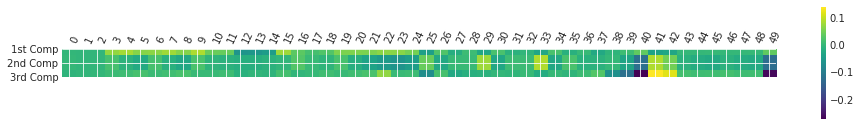

In [41]:
# classes = ['walking', 'going up the stairs',
#             'going down the stairs', 'sitting', 'standing', 'laying', 'all']

classes = list(range(50))

plt.matshow(pca.components_[:,:50],cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(classes)),classes,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

C:\Users\09ale\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


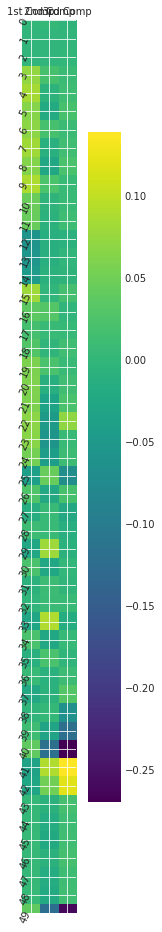

In [82]:
q = pd.DataFrame(pca.components_[:,:50])
q = q.swapaxes('index','columns')

plt.matshow(q,cmap='viridis')
plt.xticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.yticks(range(len(classes)),classes,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 